In [1]:
import pandas as pd
import shapely.geometry as geom
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import mapping
from shapely.geometry import Polygon
import rasterio
from rasterio.mask import mask
import numpy as np
from PIL import Image
import os
%matplotlib inline

In [2]:
pics = gpd.read_file("pictures/pictures.shp")
fields = gpd.read_file("Crops_2016/Crops_2016_26910.shp")

In [18]:
for i in range(0,len(fields)):
    if(fields['crop_list'][i] == None):
        fields['crop_list'][i] = 'UNKNOWN'

C:\Users\marce\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [20]:
pic1= pics.iloc[0]["geometry"]
def container(x):
    """This function applies the contain function which 
    determins if the coordinates of crop field are in a photo
    """
    return(pic1.intersects(x))
intersect_fields = fields[fields['geometry'].apply(container)]

In [12]:
geoms = intersect_fields.geometry.values
field1 =geoms[0]
json_geoms = [mapping(field1)]

In [13]:
with rasterio.open("D:\\NAIP GEOTIFF\\m_3812101_se_10_h_20160711\\m_3812101_se_10_h_20160711.tif", 'r') as src:
    out_image, out_transform = mask(src, json_geoms, crop = True)

In [35]:
x = np.swapaxes(out_image.data.transpose(),0,1)
img = Image.fromarray(x, 'RGBA')

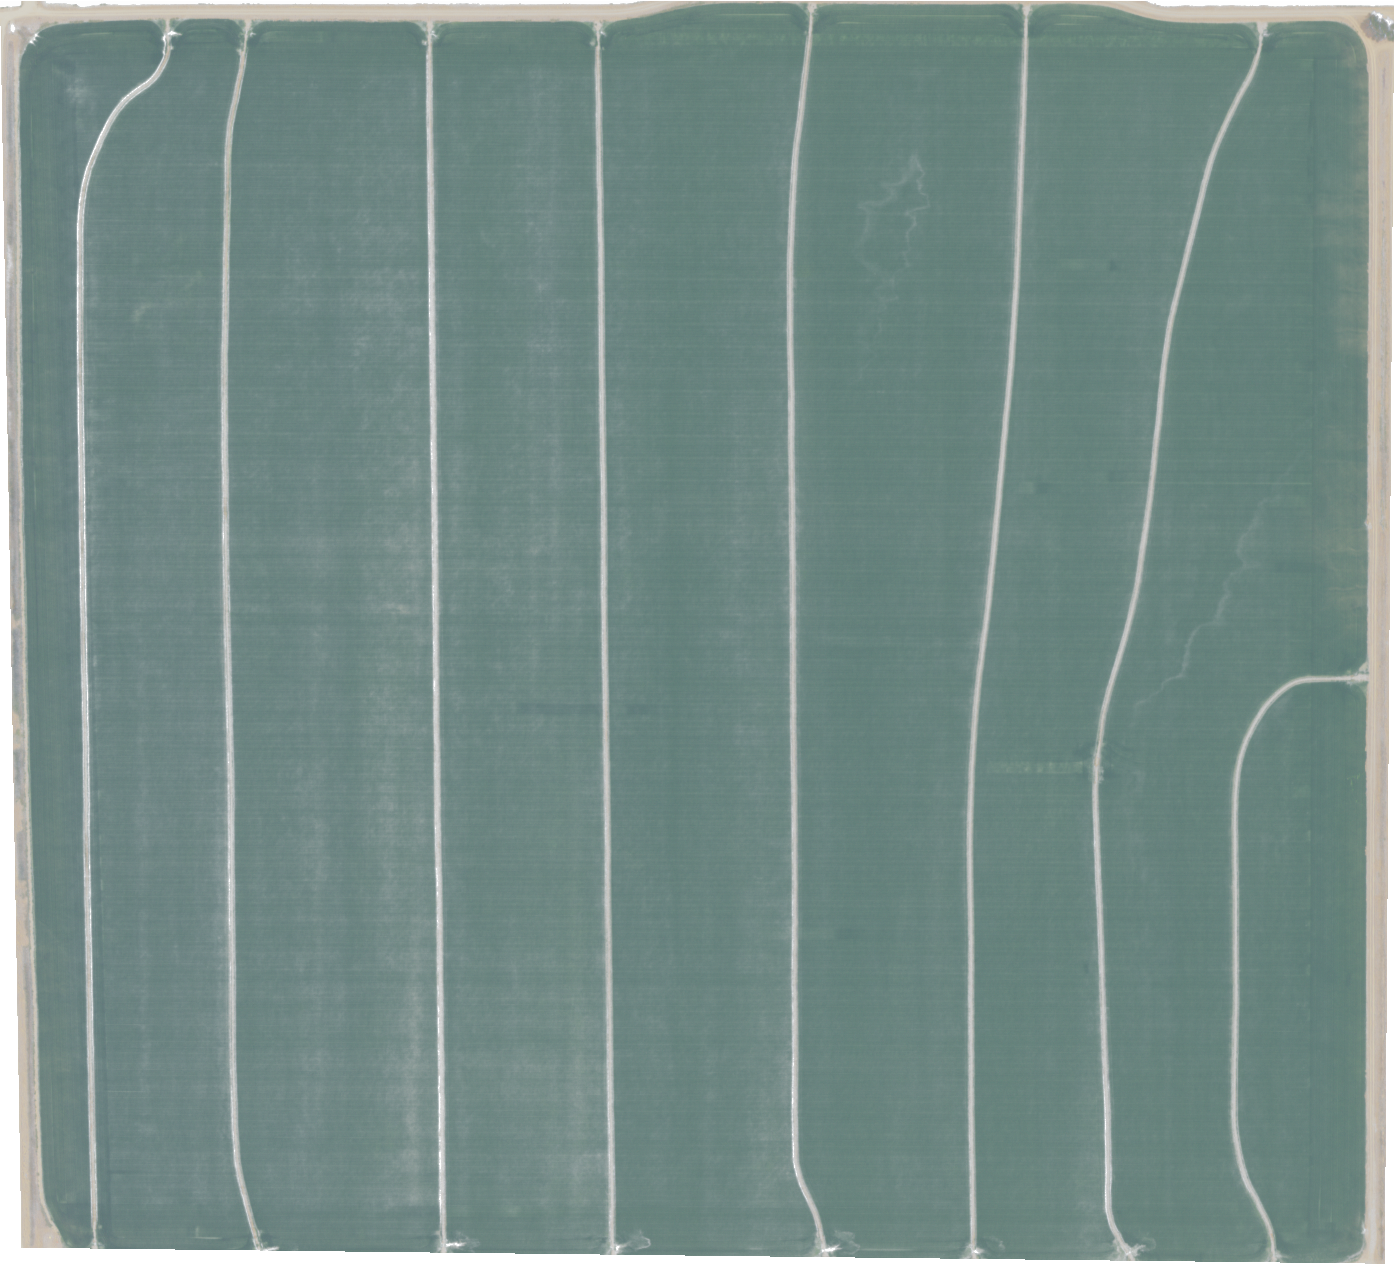

In [36]:
img

C:\Users\marce\Anaconda3\lib\site-packages\PIL\Image.py:2514: DecompressionBombWarning: Image size (117683900 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  DecompressionBombWarning)


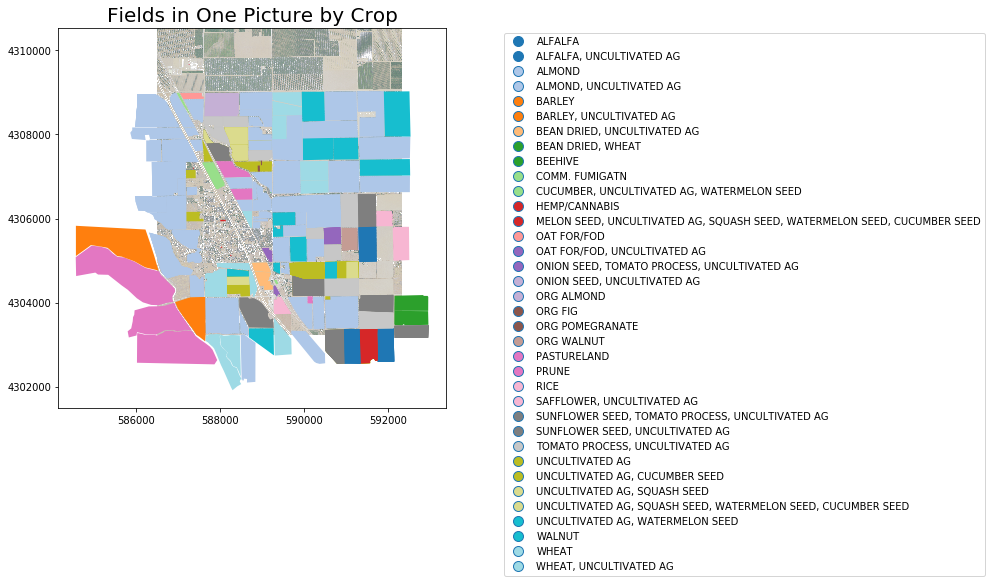

In [41]:
def plot_field(num = 0):
    path = 'D:\\NAIP GEOTIFF'
    pic_path = os.path.join(os.path.join(path, pics.iloc[num]['name'].replace('.tif', '')),pics.iloc[num]['name'] )
    def container(x):
        return(pics.iloc[num]['geometry'].intersects(x))
    intersect_fields = fields[fields['geometry'].apply(container)]
    fig, ax = plt.subplots(1, figsize=(7,7))
    plt.imshow(plt.imread(pic_path), extent= (pics.iloc[num]['geometry'].bounds[0],pics.iloc[num]['geometry'].bounds[2],pics.iloc[num]['geometry'].bounds[1],pics.iloc[num]['geometry'].bounds[3] ))
    intersect_fields.plot(ax = ax, column = 'crop_list',cmap = 'tab20',legend = True)
    l=ax.get_legend()
    l.set_bbox_to_anchor((1.5, 1, .9, 0))
    ax.set_title("Fields in One Picture by Crop", fontsize = 20)
plot_field(1)

In [ ]:
#DONT RUN THIS WILL GET EVERYTHING
path = 'D:\\NAIP GEOTIFF'
for pic in pics:
    pic_path = os.path.join(os.path.join(path, pics.iloc[0]['name'].replace('.tif', '')),pics.iloc[0]['name'] )
    def container(x):
    """This function applies the contain function which 
    determins if the coordinates of crop field are in a photo
    """
        return(pic['geometry'].intersects(x))
    intersect_fields = fields[fields['geometry'].apply(container)]
    for field in intersect_fields.geometry.values:
        new_geoms = [mapping(field)]
        picname = os.path.join(path, pic['name'])
        with rasterio.open(pic_path) as src:
            out_image, out_transform = mask(src, new_geoms, crop = True)
        x = np.swapaxes(out_image.data.transpose(),0,1)